## Data Understanding and Problem Overview
This notebook explores the credit cardfraud dataset, highlights the extreme class imbalance, 
and sets the evaluation focus on recall and threshold-based decision making rather than accuracy.

In [14]:
# Importing the downloaded data from Kaggle
import pandas as pd
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Checking number of rows and columns
df.shape

(284807, 31)

In [3]:
# Missing values check
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Descriptive statistics 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Target Variable Distribution
df.groupby('Class')['V1'].count()
#492/28315 = 0.017% (Imbalanced Data)

Class
0    284315
1       492
Name: V1, dtype: int64

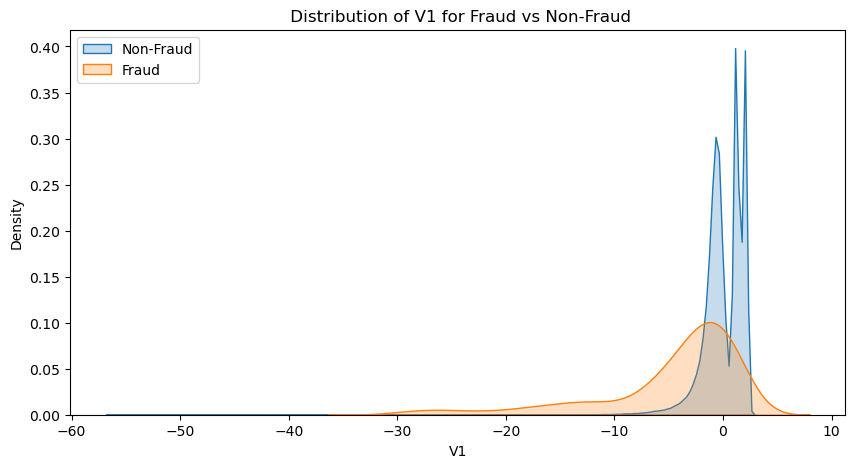

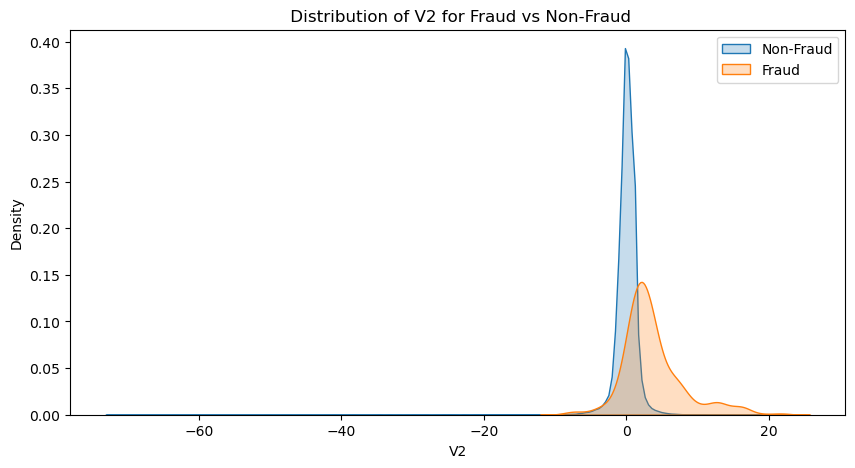

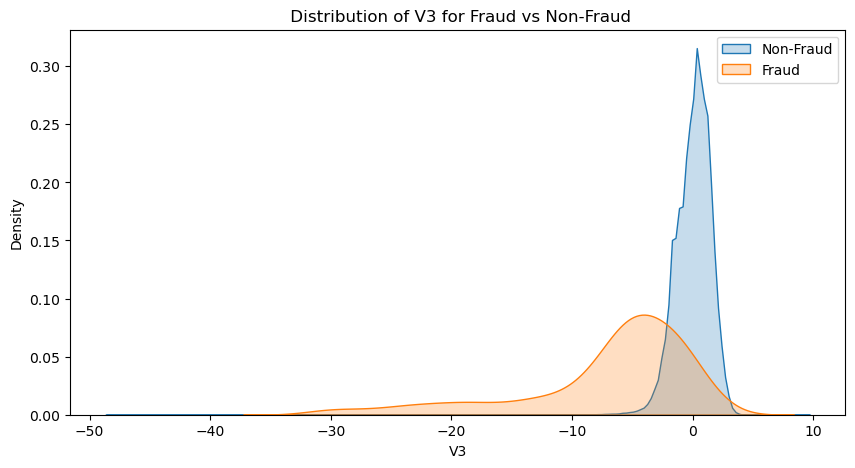

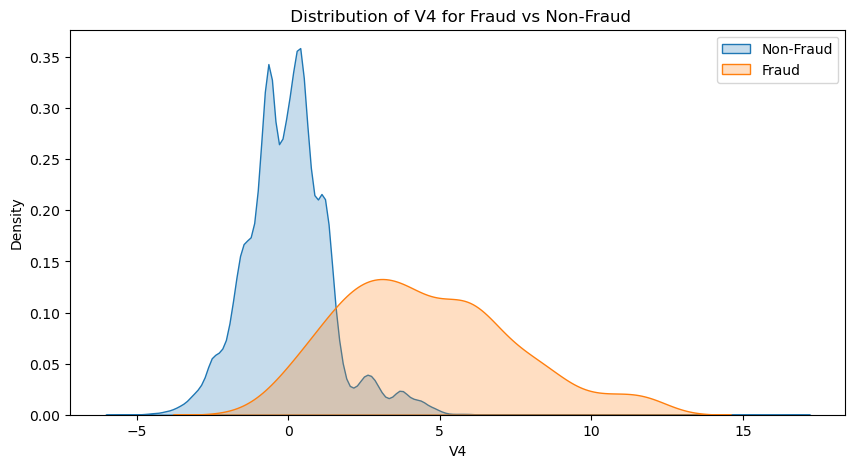

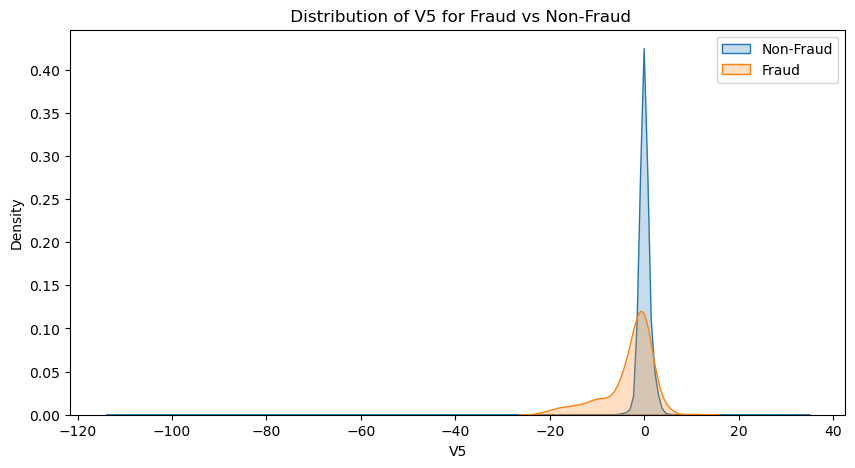

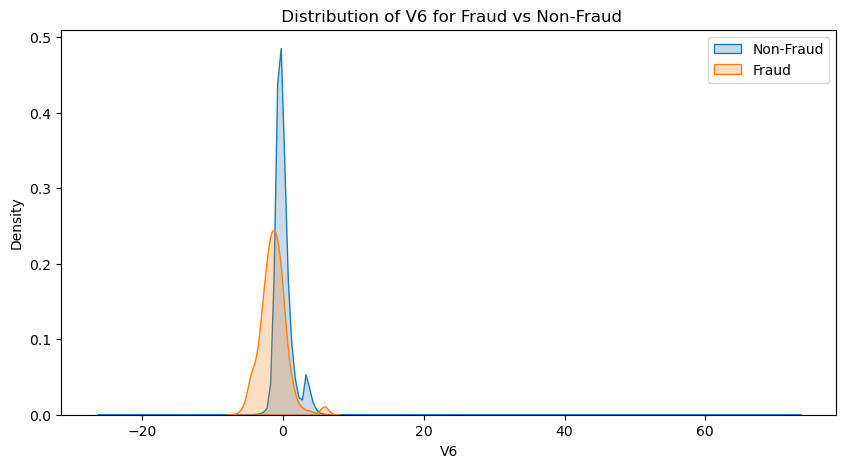

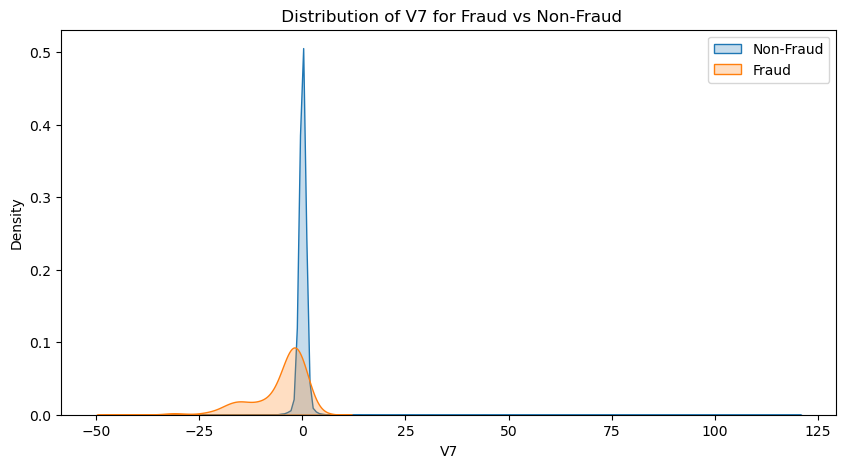

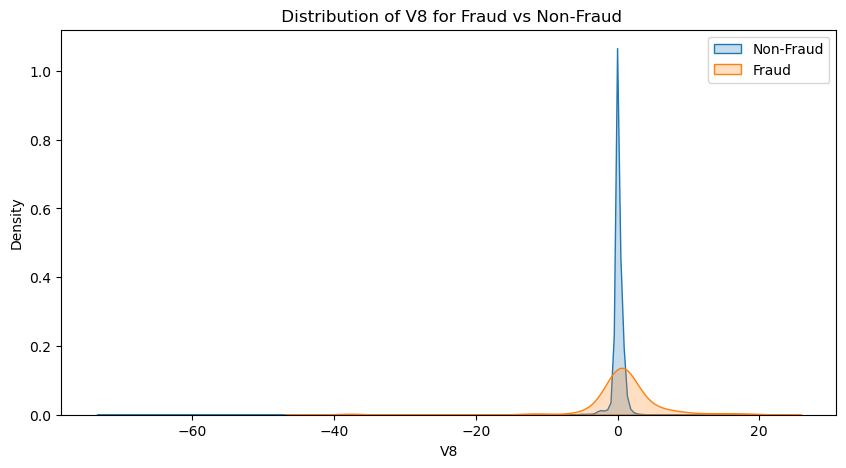

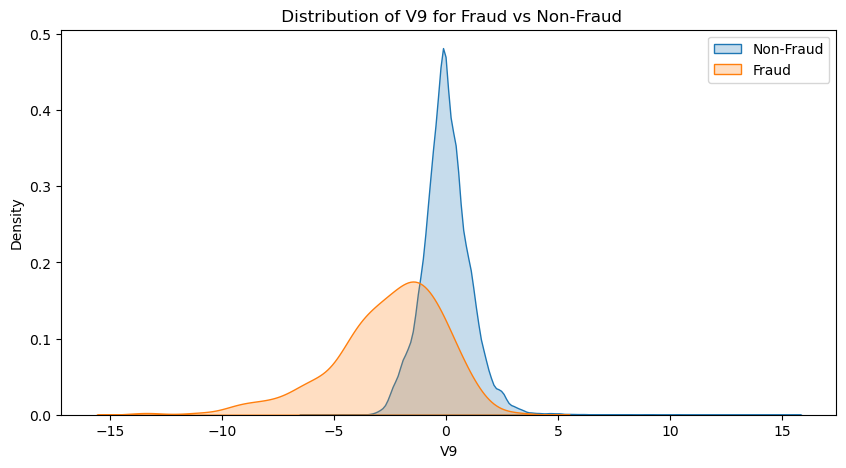

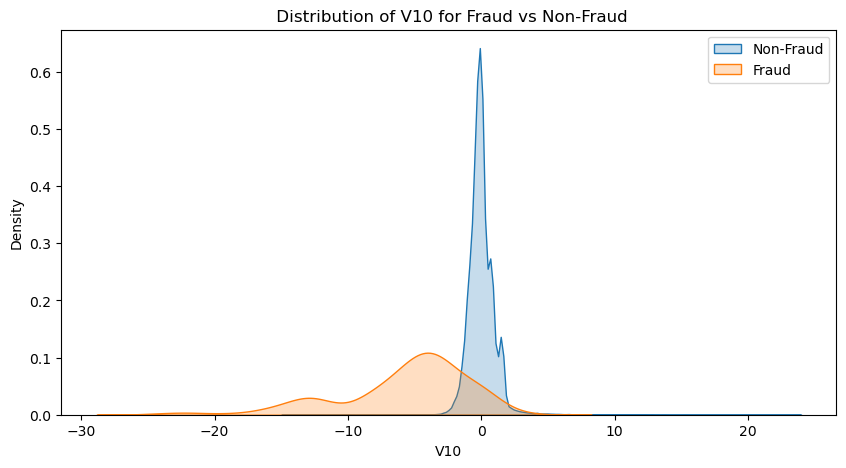

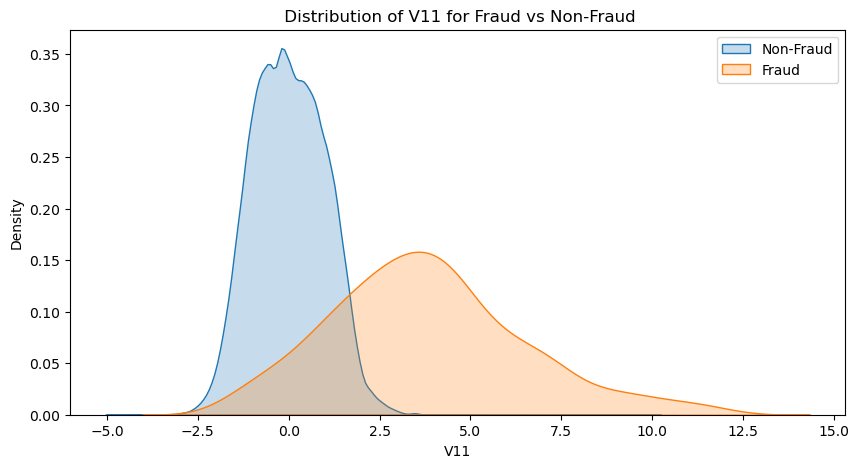

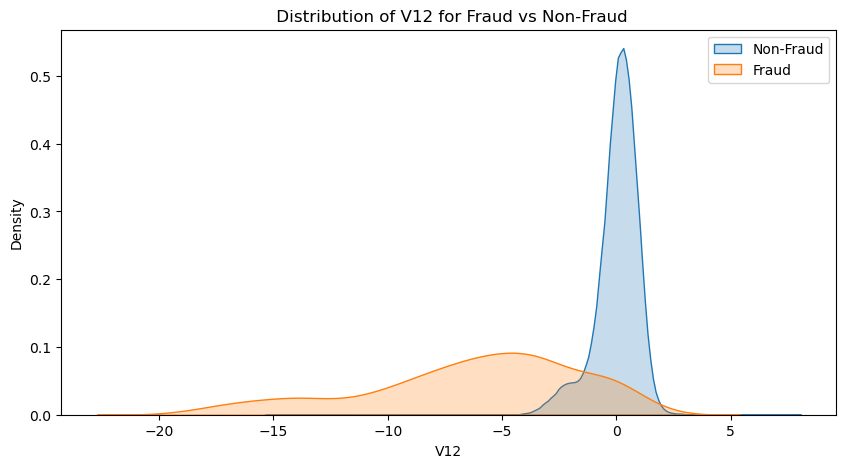

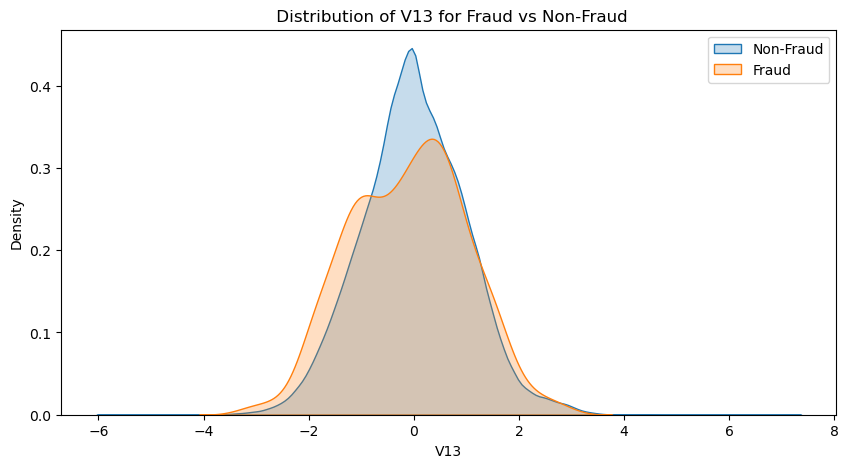

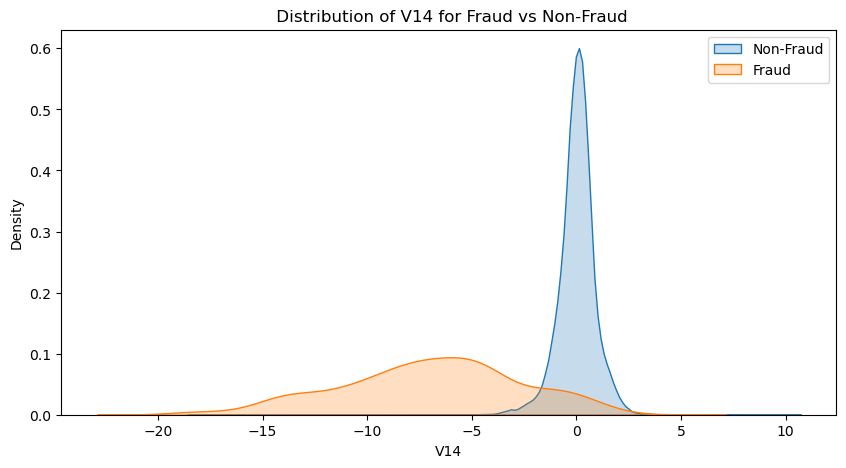

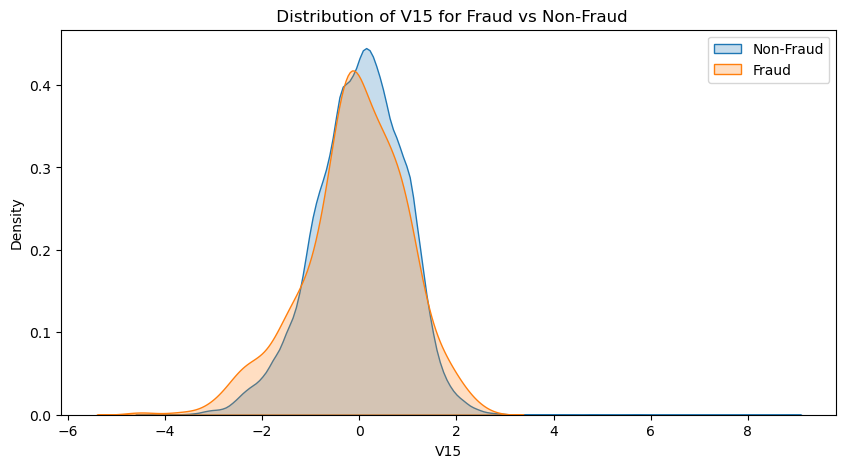

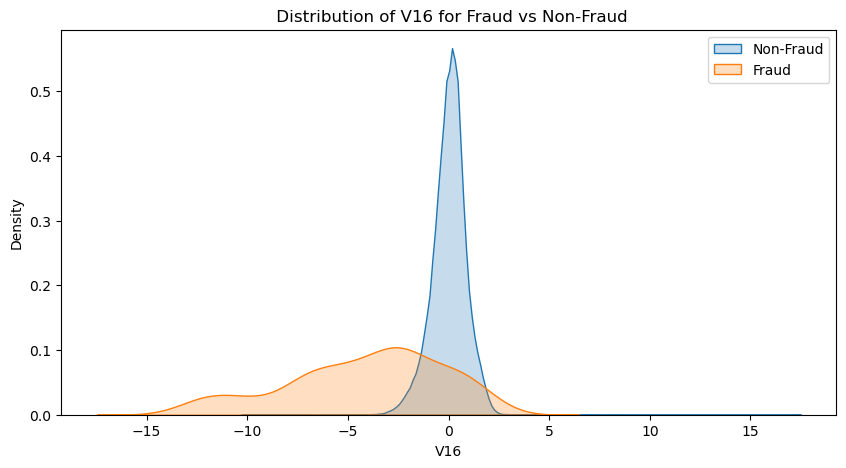

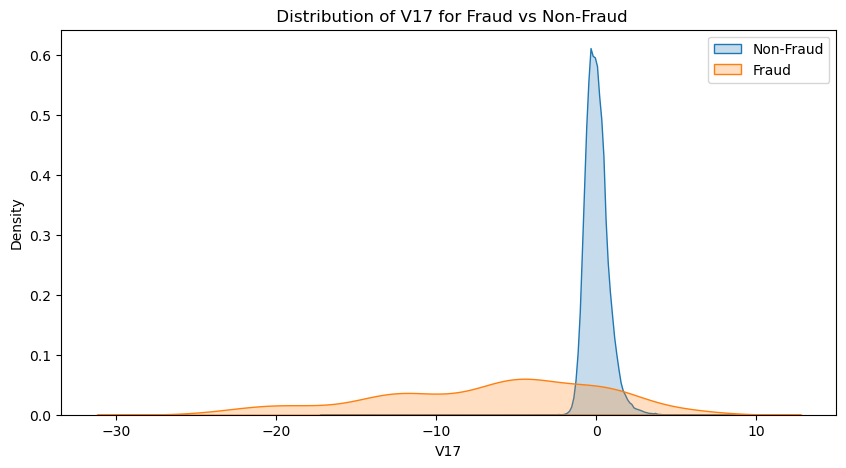

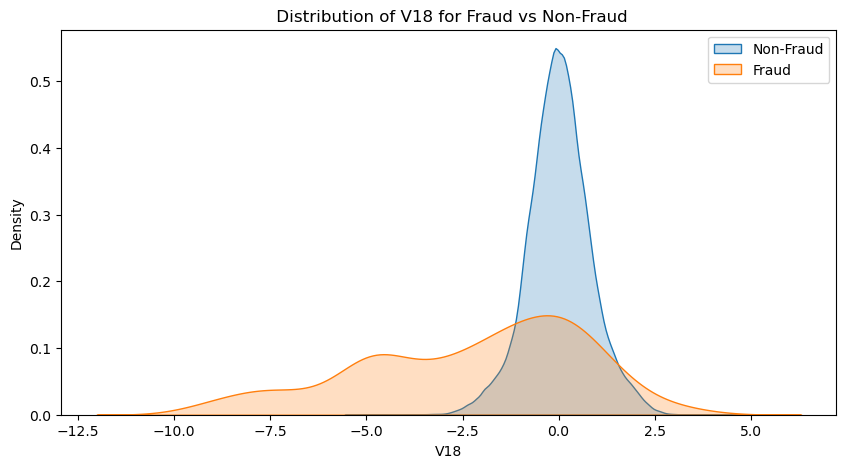

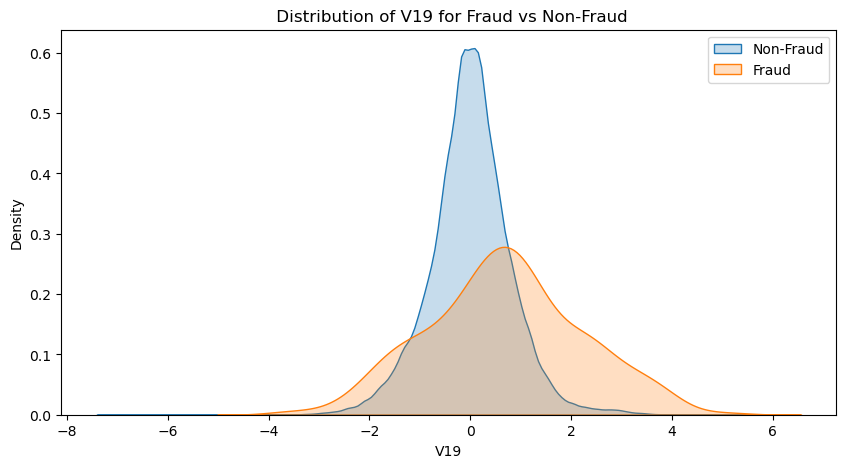

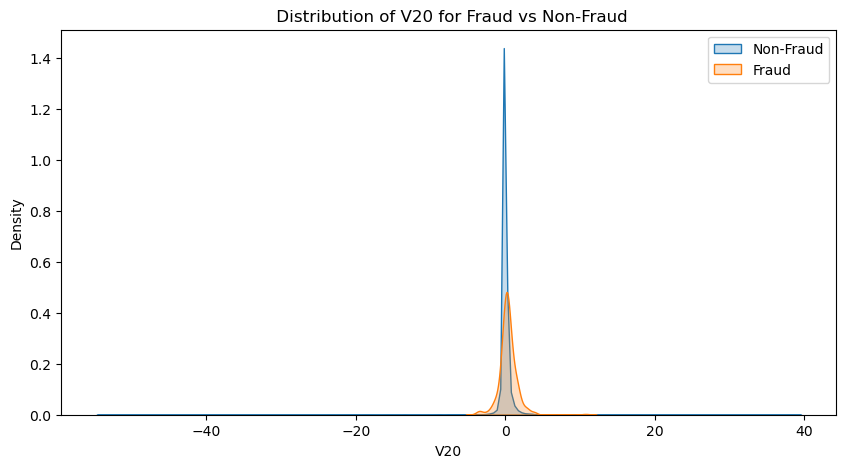

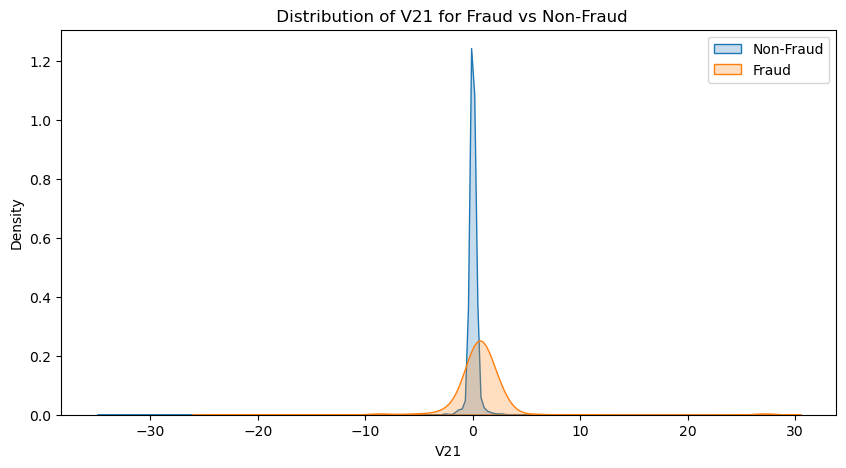

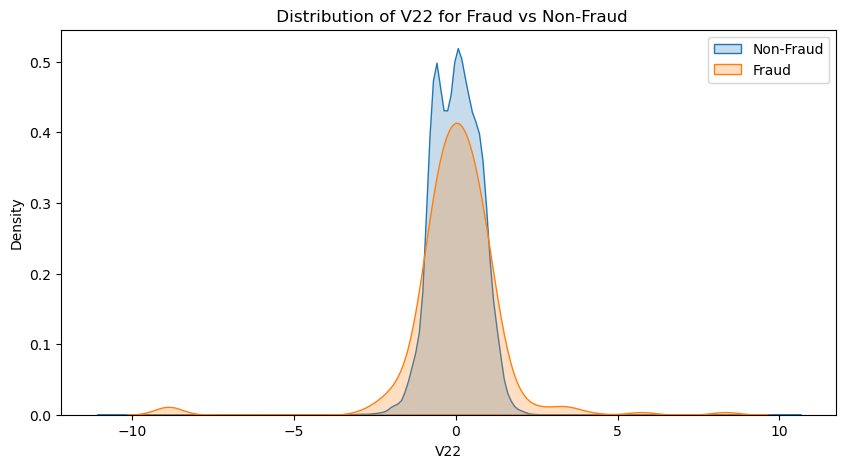

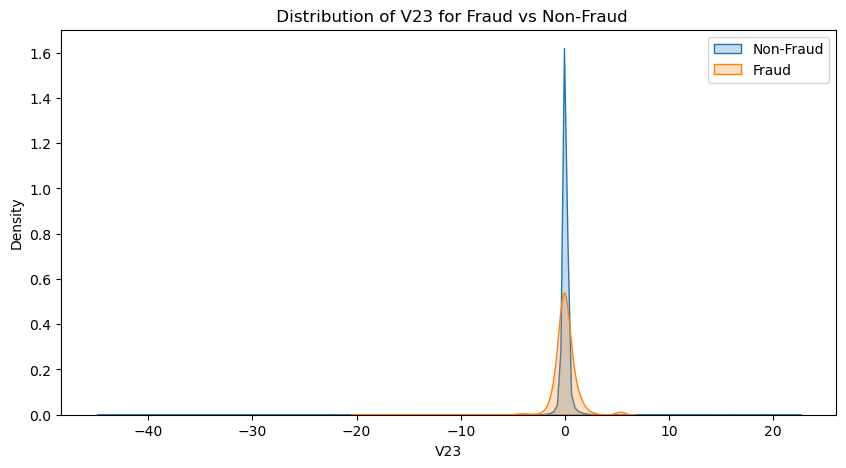

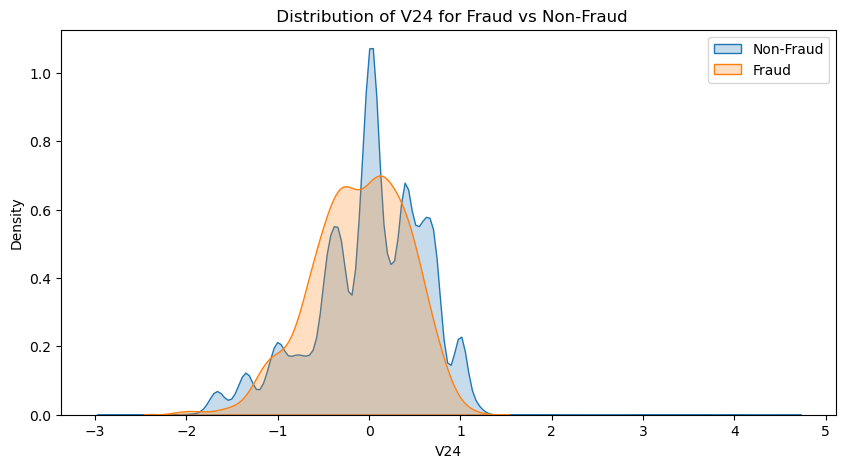

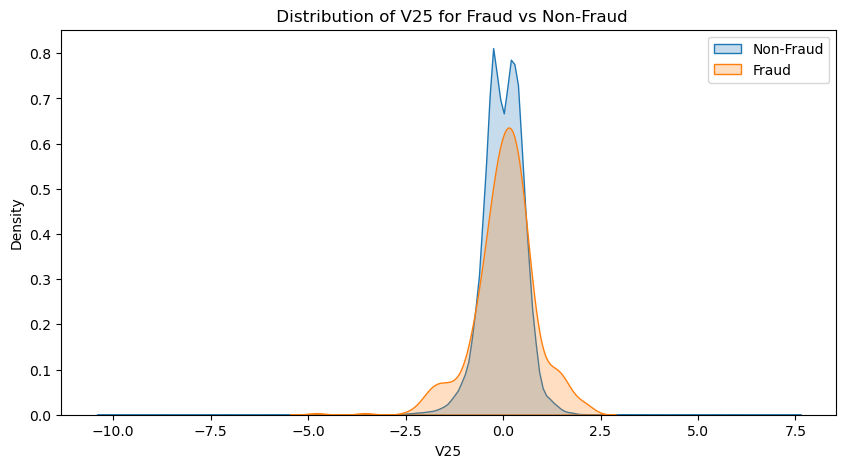

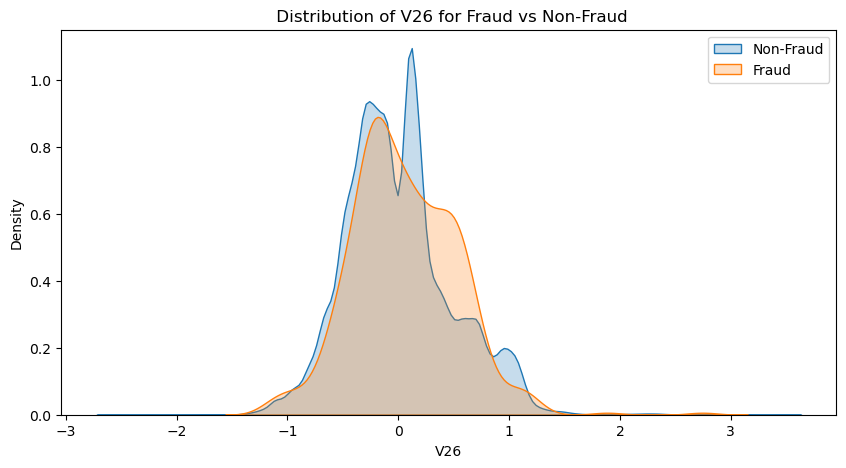

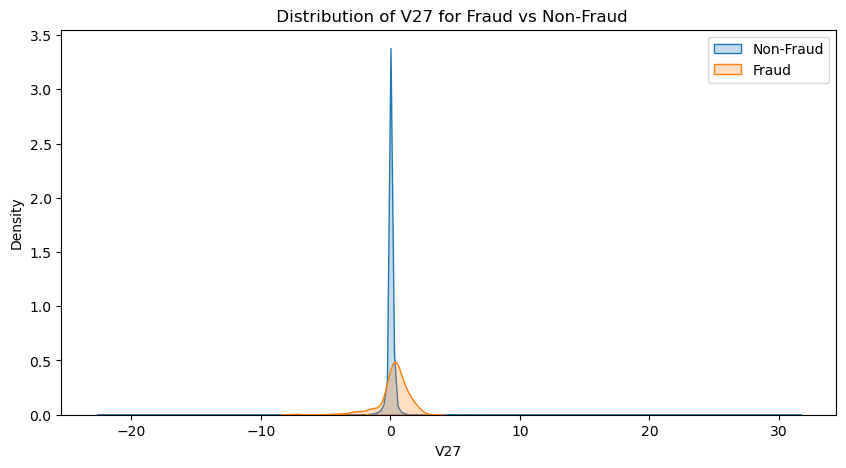

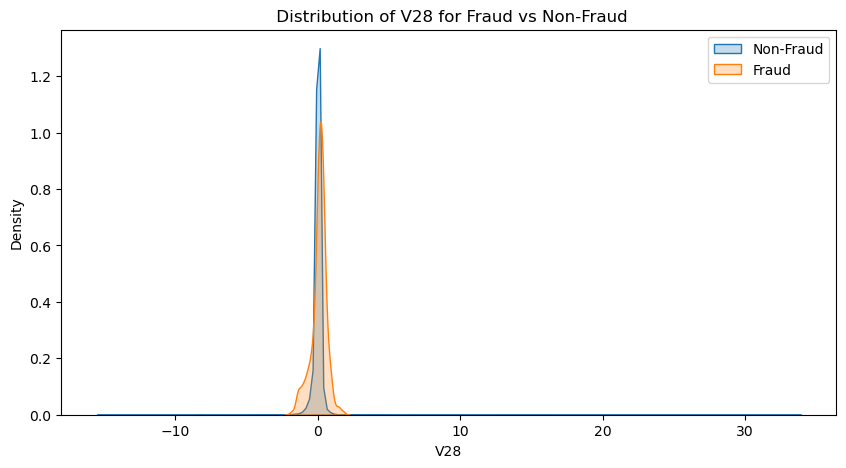

In [7]:
#EDA - Exploratory Data Analysis (Plots)
import matplotlib.pyplot as plt
import seaborn as sns

fraud =df[df['Class']==1]
nonfraud = df[df['Class']==0]

features = [col for col in df.columns if col.startswith('V')]

for feature in features:
    plt.figure(figsize = (10,5))
    sns.kdeplot(nonfraud[feature],label = 'Non-Fraud',fill=True)
    sns.kdeplot(fraud[feature],label = 'Fraud',fill=True)
    plt.title(f' Distribution of {feature} for Fraud vs Non-Fraud')
    plt.legend()
    plt.show()

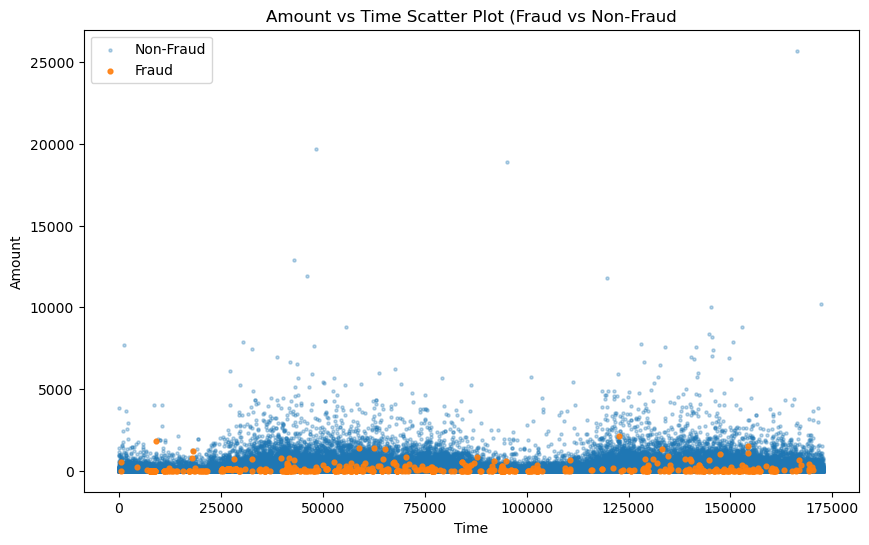

In [9]:
# Plotting scatter plots to check relationship with target classes
plt.figure(figsize = (10,6))
plt.scatter(df[df['Class']==0]['Time'], df[df['Class']==0]['Amount'], s=5, alpha=0.3, label='Non-Fraud')
plt.scatter(df[df['Class']==1]['Time'], df[df['Class']==1]['Amount'], s=12, alpha=0.9, label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title("Amount vs Time Scatter Plot (Fraud vs Non-Fraud")
plt.legend()
plt.show()

<Axes: >

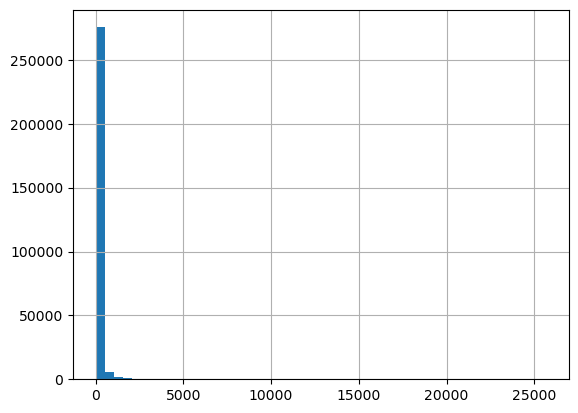

In [10]:
# Histogram to check non-fraud distribution
df[df['Class']==0]['Amount'].hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x2aa0512bed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2aa05160190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aa0512bd90>],
 'medians': [<matplotlib.lines.Line2D at 0x2aa05160410>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aa05160550>],
 'means': []}

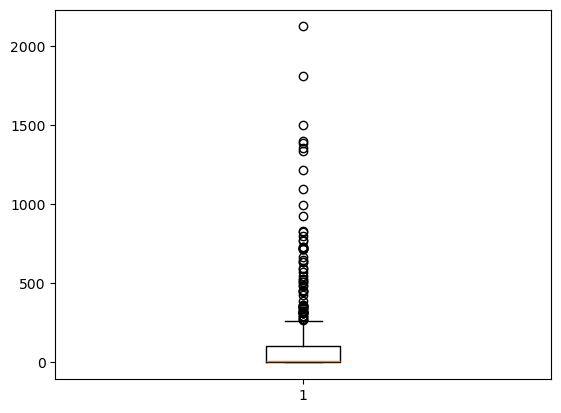

In [11]:
# Boxplot to check fraud class distribution
plt.boxplot(df[df['Class']==1]['Amount'])

In [12]:
# Correlation
df.corr()['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

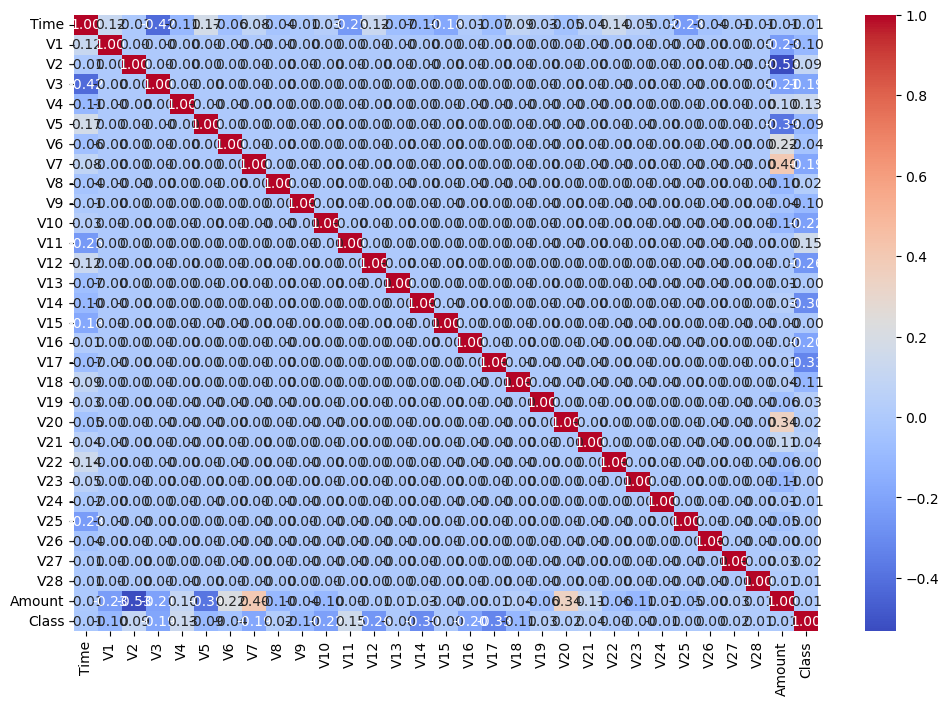

In [13]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## EDA Summary
1. Target Variable is highly imbalanced containing only 0.017% Fraud 
2. Transaction Amount - significant outliers observed (most transactions fall between 0 and 100 with median around 22) (5,000 above are outliers)
3. Fraud and Non-Fraud transactions occur throughout the same range (No clear separation)
4. Useful - V10, V14, V12 V17 etc
5. Likely Not useful - V28,V25, V23, V22, V21, V20, V15, V13